# Student Performance Prediction Project

### Project introduction:

This project aims to predict students academic performance, identify impacted elements, and provide reliable suggestions to develop students' learning motivations and fully prepare for future success.  


The dataset was extracted from [Kaggle](https://www.kaggle.com/datasets/larsen0966/student-performance-data-set). There are 600+ rows and 33 features. This dataset includes student academic achievement in secondary education of two Portuguese schools. The covered features include three areas: students' demographic information, students' academic performance, as well as their social and school related features.    

### Feature Information:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2. sex - student's sex (binary: 'F' - female or 'M' - male)

3. age - student's age (numeric: from 15 to 22)

4. address - student's home address type (binary: 'U' - urban or 'R' - rural)

5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - “ 5th to 9th grade, 3 - “ secondary education or 4 - “ higher education)

8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 -“ 5th to 9th grade, 3 - “ secondary education or 4 - “ higher education)

9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13. traveltime - home to school travel time (numeric: 1 - < 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14. studytime - weekly study time (numeric: 1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15. failures - number of past class failures (numeric: n if 1 <= n < 3, else 4)

16. schoolsup - extra educational support (binary: yes or no)

17. famsup - family educational support (binary: yes or no)

18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19. activities - extra-curricular activities (binary: yes or no)

20. nursery - attended nursery school (binary: yes or no)

21. higher - wants to take higher education (binary: yes or no)

22. internet - Internet access at home (binary: yes or no)

23. romantic - with a romantic relationship (binary: yes or no)

24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29. health - current health status (numeric: from 1 - very bad to 5 - very good)

30. absences - number of school absences (numeric: from 0 to 93)

31. G1 - first period grade (numeric: from 0 to 20)

31. G2 - second period grade (numeric: from 0 to 20)

32. G3 - final grade (numeric: from 0 to 20, output target)

* [Part 0: Load Packages and Load Data](#Part-0:-Load-Packages-and-Load-Data)
* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Engineering](#Part-2:-Feature-Engineering)
* [Part 3: Model Training](#Part-3:-Model-Training)
* [Part 4: Model Results Evaluation](#Part-3:-Model-Results-Evaluation)

# Part 0: Load Packages and Load Data

In [1]:
#import neccessary libraries
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)   # .float_format  means the precision of displaying numbers, that is 3 dicimal places 
pd.set_option('display.max_columns',None)  # display.max_columns  means maximum displayed columns ， None means display all columns 
pd.set_option('display.max_rows',None) 

In [2]:
SPF = pd.read_csv('student-perform.csv', header=0) # header=0 means identifying the first row is the column title 
                                                                    
SPF.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
SPF.shape

(649, 33)

# Part 1: Data Exploration

## 1.1 Preview Feature Information

In [4]:
SPF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

## 1.2 Checking Duplicates and Missingness

In [5]:
# check duplicated records
if SPF.duplicated().sum() == 0:
  print('no duplicated index')

no duplicated index


In [6]:
# checking missing data
SPF.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
# Validate value of 0

(SPF == 0).sum(axis=0) / SPF.shape[0]    # .shape will return a tuple representing the dimensionality of the DataFrame;   
                                           # df.shape[0] return total row,  df.shape[1] return total column

school       0.000
sex          0.000
age          0.000
address      0.000
famsize      0.000
Pstatus      0.000
Medu         0.009
Fedu         0.011
Mjob         0.000
Fjob         0.000
reason       0.000
guardian     0.000
traveltime   0.000
studytime    0.000
failures     0.846
schoolsup    0.000
famsup       0.000
paid         0.000
activities   0.000
nursery      0.000
higher       0.000
internet     0.000
romantic     0.000
famrel       0.000
freetime     0.000
goout        0.000
Dalc         0.000
Walc         0.000
health       0.000
absences     0.376
G1           0.002
G2           0.011
G3           0.023
dtype: float64

After checking the definition of following features: Medu, Fedu, failure, and absences, the value of 0 is meaningful, thus those value of 0 are not missing value. However, additional three variables (G1,G2,G3) are not in this case. Therefor, missing data were only detected on three variables: G1, G2, G3.  

## 1.3 Understand Numerical Features

### 1.3.1 Calculating descriptive statistics

In [8]:
SPF.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.95])  

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000,649.000,649.000,649.000,649.000,649.000,649.000,649.000,649.000,649.000,649.000,649.000,649.000,649.000,649.000,649.000
mean,16.744,2.515,2.307,1.569,1.931,0.222,3.931,3.180,3.185,1.502,2.280,3.536,3.659,11.399,11.570,11.906
std,1.218,1.135,1.100,0.749,0.830,0.593,0.956,1.051,1.176,0.925,1.284,1.446,4.641,2.745,2.914,3.231
min,15.000,0.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000
10%,15.000,1.000,1.000,1.000,1.000,0.000,3.000,2.000,2.000,1.000,1.000,1.000,0.000,8.000,8.000,8.800
25%,16.000,2.000,1.000,1.000,1.000,0.000,4.000,3.000,2.000,1.000,1.000,2.000,0.000,10.000,10.000,10.000
50%,17.000,2.000,2.000,1.000,2.000,0.000,4.000,3.000,3.000,1.000,2.000,4.000,2.000,11.000,11.000,12.000
75%,18.000,4.000,3.000,2.000,2.000,0.000,5.000,4.000,4.000,2.000,3.000,5.000,6.000,13.000,13.000,14.000
95%,19.000,4.000,4.000,3.000,4.000,1.000,5.000,5.000,5.000,4.000,5.000,5.000,12.000,16.000,17.000,17.000
max,22.000,4.000,4.000,4.000,4.000,3.000,5.000,5.000,5.000,5.000,5.000,5.000,32.000,19.000,19.000,19.000


### 1.3.2 Understanding features distributions

In [9]:
num_features = SPF.columns[SPF.dtypes =='int64'] 
num_features

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>,
        <AxesSubplot:title={'center':'G3'}>]], dtype=object)

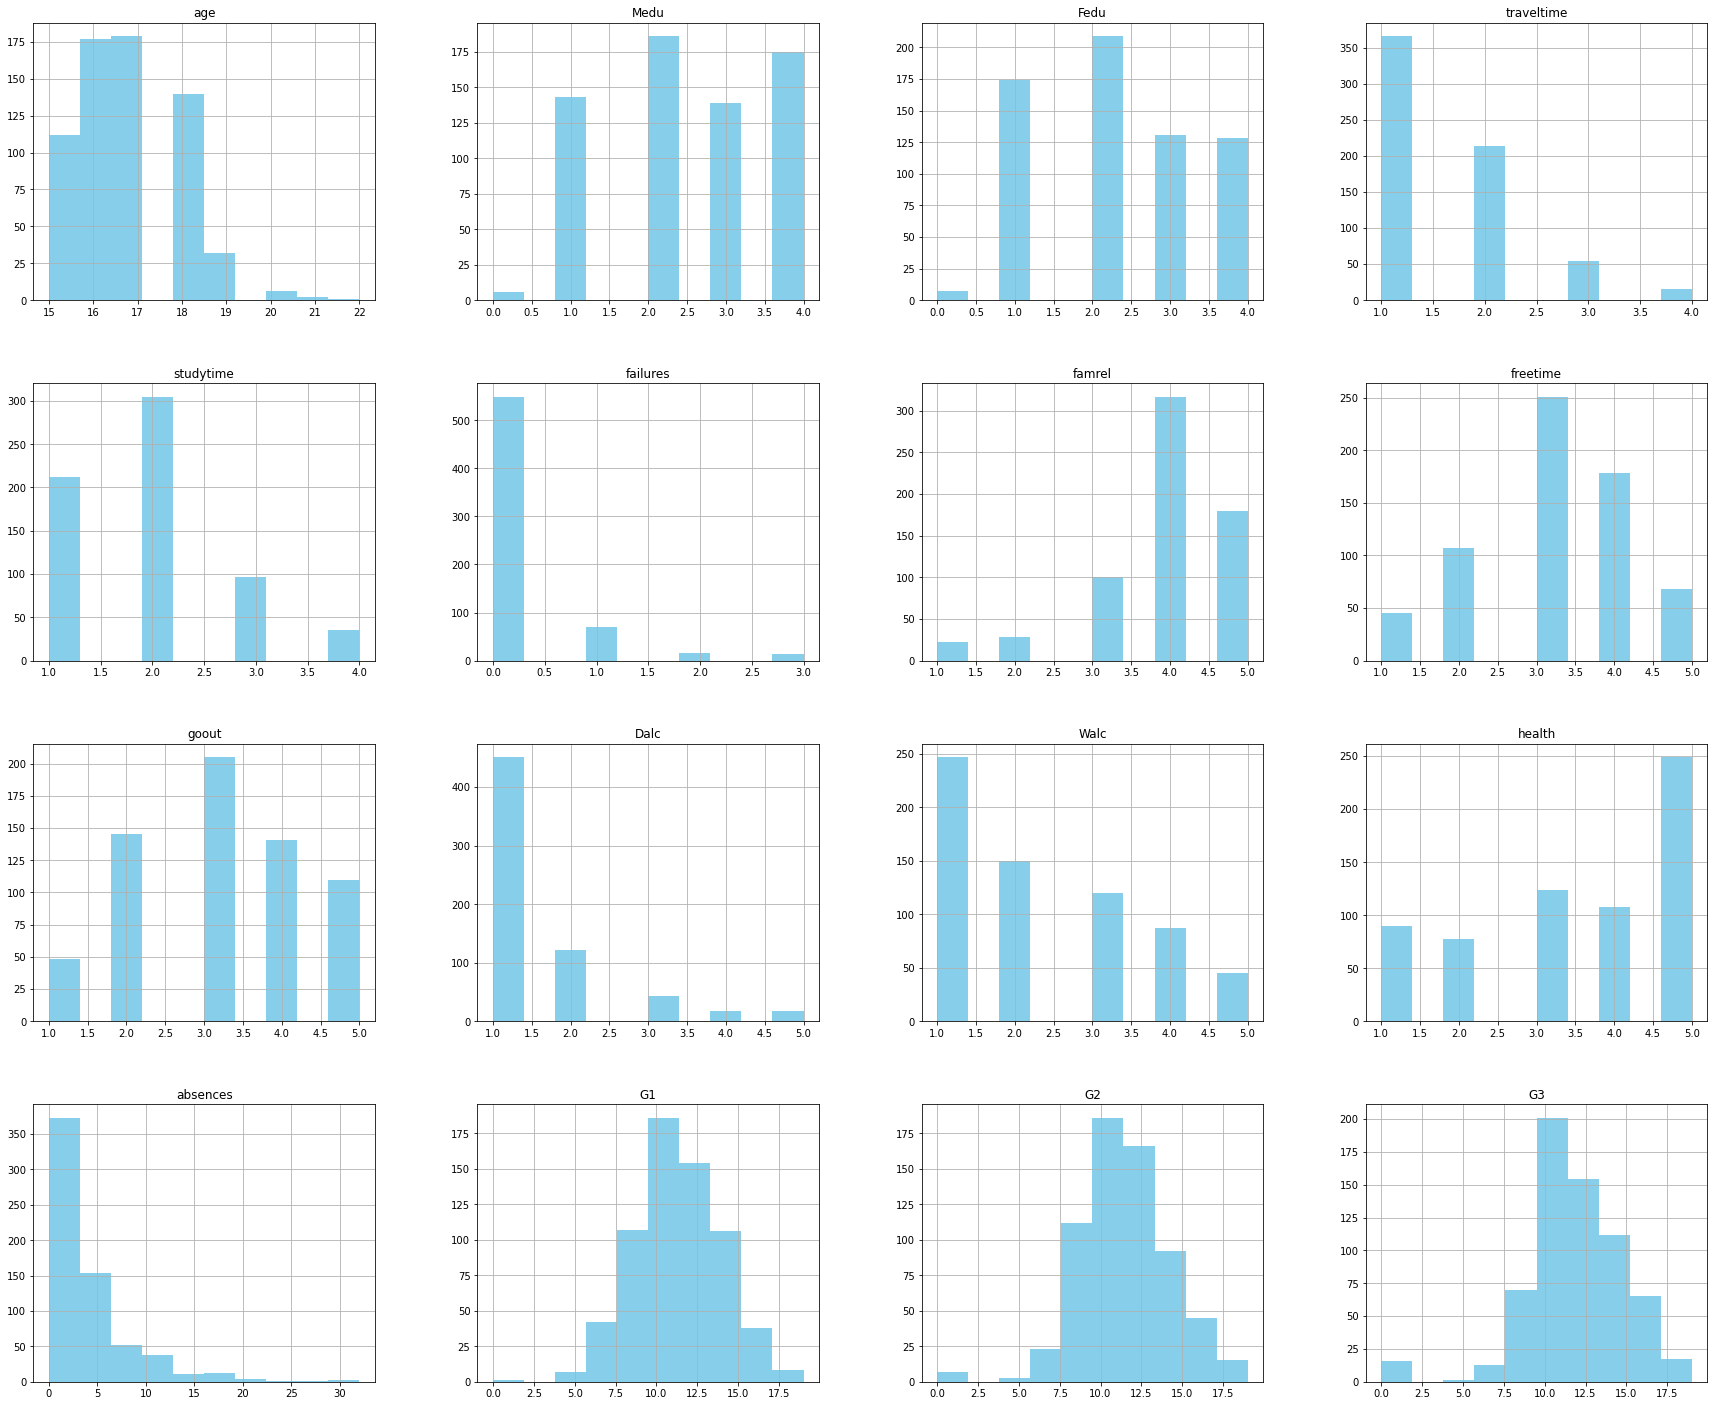

In [10]:
SPF[num_features].hist(figsize=(30, 25), color='skyblue')

### 1.3.3 Features distributions

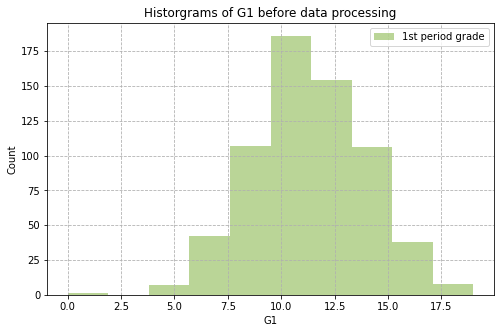

In [11]:
# Visualize the distribution of the 1st grade feature: G1 
plt.figure(figsize=(8, 5))
plt.hist(SPF['G1'], color="#77AC30", label='1st period grade', alpha=0.5)  
plt.title('Historgrams of G1 before data processing')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--')
plt.xlabel('G1')
plt.ylabel('Count')
plt.show()

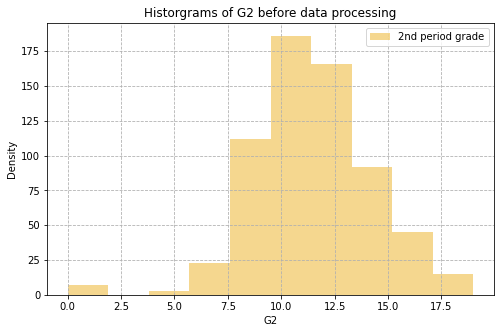

In [12]:
# Visualize the distribution of the 2nd grade feature: G2
plt.figure(figsize=(8, 5))
plt.hist(SPF['G2'], color='#EDB120', label='2nd period grade', alpha=0.5)  
plt.title('Historgrams of G2 before data processing')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--')
plt.xlabel('G2')
plt.ylabel('Density')
plt.show()

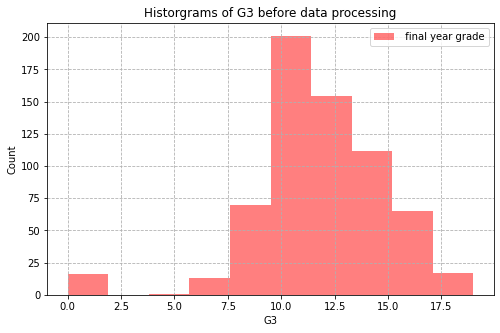

In [13]:
# Visualize the distribution of the 3rd grade feature: G3 
plt.figure(figsize=(8, 5))
plt.hist(SPF['G3'], color='r', label=' final year grade', alpha=0.5)  
plt.title('Historgrams of G3 before data processing')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--')
plt.xlabel('G3')
plt.ylabel('Count')
plt.show()

### 1.3.4 Relationship between numerical features 

In [14]:
SPF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [15]:
cor_matrix = SPF[num_features].corr()
cor_matrix

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000,-0.108,-0.121,0.034,-0.008,0.320,-0.021,-0.005,0.113,0.135,0.086,-0.009,0.150,-0.174,-0.107,-0.107
Medu,-0.108,1.000,0.647,-0.265,0.097,-0.172,0.024,-0.020,0.010,-0.007,-0.020,0.005,-0.009,0.260,0.264,0.240
Fedu,-0.121,0.647,1.000,-0.208,0.050,-0.166,0.020,0.007,0.028,0.000,0.038,0.045,0.030,0.218,0.225,0.212
traveltime,0.034,-0.265,-0.208,1.000,-0.063,0.098,-0.010,0.001,0.057,0.093,0.057,-0.048,-0.008,-0.154,-0.154,-0.127
studytime,-0.008,0.097,0.050,-0.063,1.000,-0.147,-0.004,-0.069,-0.075,-0.138,-0.215,-0.056,-0.118,0.261,0.240,0.250
failures,0.320,-0.172,-0.166,0.098,-0.147,1.000,-0.063,0.109,0.045,0.106,0.082,0.036,0.123,-0.384,-0.386,-0.393
famrel,-0.021,0.024,0.020,-0.010,-0.004,-0.063,1.000,0.129,0.090,-0.076,-0.094,0.110,-0.090,0.049,0.090,0.063
freetime,-0.005,-0.020,0.007,0.001,-0.069,0.109,0.129,1.000,0.346,0.110,0.120,0.085,-0.019,-0.094,-0.107,-0.123
goout,0.113,0.010,0.028,0.057,-0.075,0.045,0.090,0.346,1.000,0.245,0.389,-0.016,0.085,-0.074,-0.079,-0.088
Dalc,0.135,-0.007,0.000,0.093,-0.138,0.106,-0.076,0.110,0.245,1.000,0.617,0.059,0.173,-0.195,-0.189,-0.205


<AxesSubplot:>

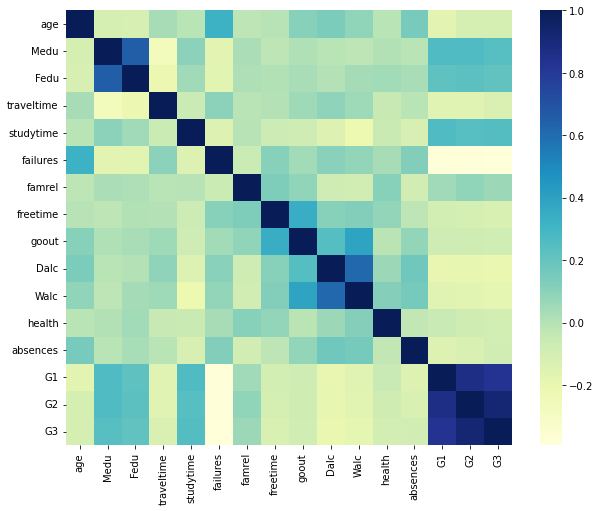

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, cmap='YlGnBu')

In [17]:
SPF['cur_avg'] = (SPF['G1'] + SPF['G2'] + SPF['G3']) / 3
SPF.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cur_avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,7.333
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.000
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.333


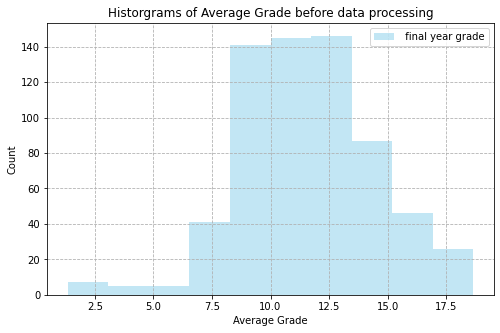

In [18]:
# Visualize the distribution of the label feature: cur_avg
plt.figure(figsize=(8, 5))
plt.hist(SPF['cur_avg'], color='skyblue', label=' final year grade', alpha=0.5)  
plt.title('Historgrams of Average Grade before data processing')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--')
plt.xlabel('Average Grade')
plt.ylabel('Count')
plt.show()

## 1.4 Understand Categorical Features

### 1.4.1 Distribution of standard categorical features

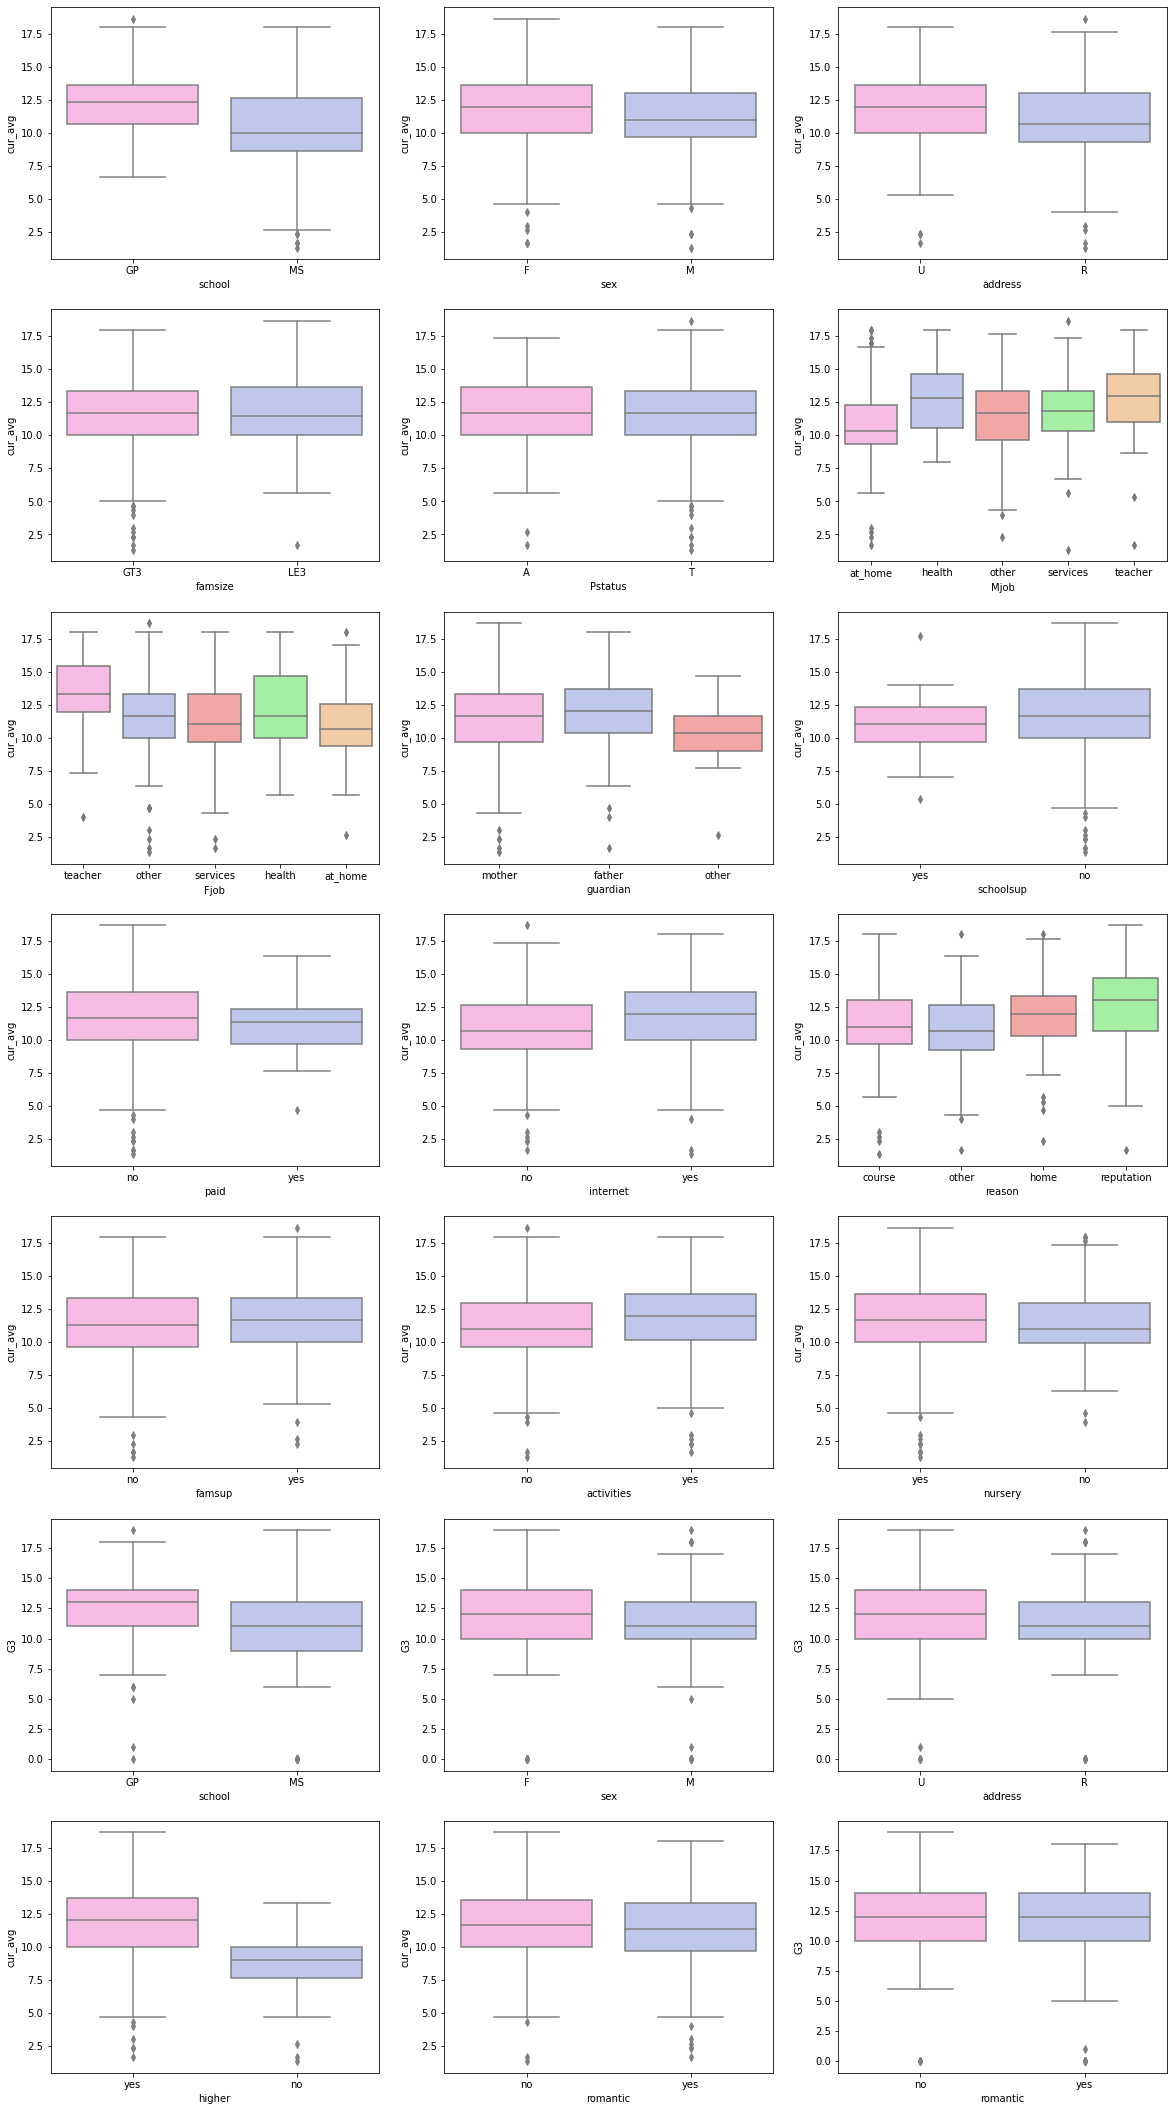

In [19]:
fig, axss = plt.subplots(7,3, figsize=[20,38])

my_colors = ['#ffb3e6', '#B7C3F3', 
              '#ff9999','#98FB98','#ffcc99']
  

sns.set_palette( my_colors )

sns.boxplot(x='school', y='cur_avg', data=SPF, ax=axss[0][0])
sns.boxplot(x='sex', y='cur_avg', data=SPF, ax=axss[0][1])
sns.boxplot(x='address', y='cur_avg', data=SPF, ax=axss[0][2])

sns.boxplot(x='famsize', y='cur_avg', data=SPF, ax=axss[1][0])
sns.boxplot(x='Pstatus', y='cur_avg', data=SPF, ax=axss[1][1])
sns.boxplot(x='Mjob', y='cur_avg', data=SPF, ax=axss[1][2])

sns.boxplot(x='Fjob', y='cur_avg', data=SPF, ax=axss[2][0])
sns.boxplot(x='guardian', y='cur_avg', data=SPF, ax=axss[2][1])
sns.boxplot(x='schoolsup', y='cur_avg', data=SPF, ax=axss[2][2])

sns.boxplot(x='paid', y='cur_avg', data=SPF, ax=axss[3][0])
sns.boxplot(x='internet', y='cur_avg', data=SPF, ax=axss[3][1])
sns.boxplot(x='reason', y='cur_avg', data=SPF, ax=axss[3][2])

sns.boxplot(x='famsup', y='cur_avg', data=SPF, ax=axss[4][0])
sns.boxplot(x='activities', y='cur_avg', data=SPF, ax=axss[4][1])
sns.boxplot(x='nursery', y='cur_avg', data=SPF, ax=axss[4][2])

sns.boxplot(x='school', y='G3', data=SPF, ax=axss[5][0])
sns.boxplot(x='sex', y='G3', data=SPF, ax=axss[5][1])
sns.boxplot(x='address', y='G3', data=SPF, ax=axss[5][2])

sns.boxplot(x='higher', y='cur_avg', data=SPF, ax=axss[6][0])
sns.boxplot(x='romantic', y='cur_avg', data=SPF, ax=axss[6][1])
sns.boxplot(x='romantic', y='G3', data=SPF, ax=axss[6][2])


plt.show()

### 1.4.2 Distribution of demorgraphic info

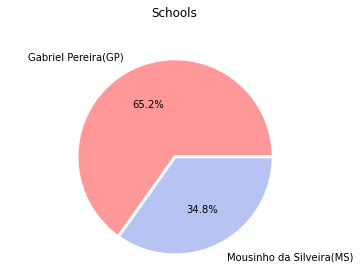

In [20]:
# create school data
names='Gabriel Pereira(GP)', 'Mousinho da Silveira(MS)' ,
values=[len(SPF[SPF['school'].str.contains('GP')]), len(SPF[SPF['school'].str.contains('MS')])]
colors = ['#ff9999', '#B7C3F3']

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%', colors = colors);
plt.title('Schools', pad=32);
plt.axis('equal');
plt.show();

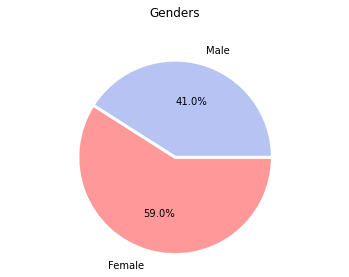

In [21]:
# create gender data
names='Male', 'Female' ,
values=[len(SPF[SPF['sex'].str.contains('M')]), len(SPF[SPF['sex'].str.contains('F')])]
colors = ['#B7C3F3', '#ff9999']

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%', colors = colors);
plt.title('Genders', pad=32);

plt.axis('equal');
plt.show();

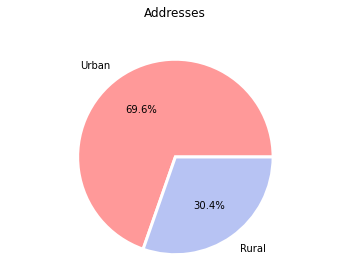

In [22]:
# create address data
names='Urban', 'Rural',
values=[len(SPF[SPF['address'].str.contains('U')]), len(SPF[SPF['address'].str.contains('R')])]
colors = ['#ff9999', '#B7C3F3']

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%', colors = colors);
plt.title('Addresses', pad=32);

plt.axis('equal');
plt.show();

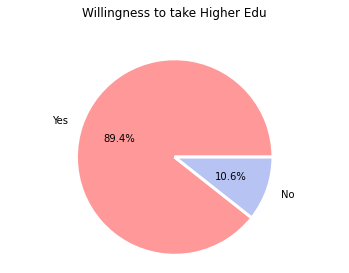

In [23]:
# create higher-edu-plan data
names='Yes', 'No',
values=[len(SPF[SPF['higher'].str.contains('yes')]), len(SPF[SPF['higher'].str.contains('no')])]
colors = ['#ff9999', '#B7C3F3']

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%', colors = colors);
plt.title('Willingness to take Higher Edu', pad=32);

plt.axis('equal');
plt.show();

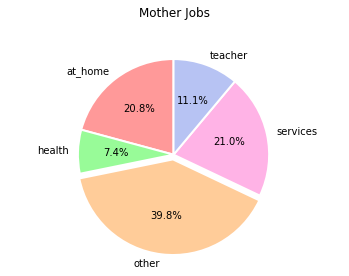

In [24]:
Mjob = 'at_home', 'health', 'other', 'services', 'teacher'
sizes = [135, 48, 258, 136, 72]
explode = (0, 0, 0.05, 0, 0) 
colors = [ '#ff9999','#98FB98','#ffcc99','#ffb3e6', '#B7C3F3' ] 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, explode=explode, labels=Mjob, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Mother Jobs', pad=32);
plt.show()

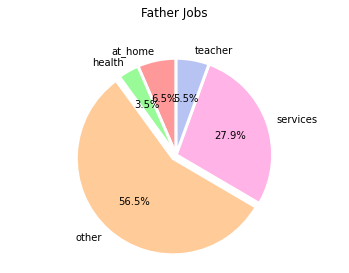

In [25]:
Fjob = 'at_home', 'health', 'other', 'services', 'teacher'
sizes = [42, 23, 367, 181, 36]
explode = (0, 0, 0.05, 0, 0) 
colors = [ '#ff9999','#98FB98','#ffcc99','#ffb3e6', '#B7C3F3' ] 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, explode=explode, labels=Fjob, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Father Jobs', pad=32)
plt.show()

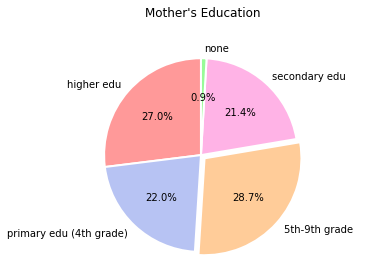

In [26]:
Mjob = 'higher edu', 'primary edu (4th grade)', '5th-9th grade', 'secondary edu', 'none'
sizes = [175, 143, 186, 139, 6]
explode = (0, 0, 0.05, 0, 0)  
colors = [ '#ff9999','#B7C3F3','#ffcc99','#ffb3e6', '#98FB98' ] 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, explode=explode, labels=Mjob, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Mother's Education", pad=32);
plt.show()

In [27]:
# SPF['Fedu'].unique()

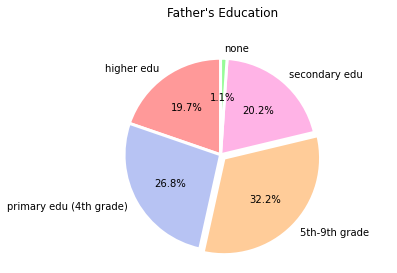

In [28]:
Fjob = 'higher edu', 'primary edu (4th grade)', '5th-9th grade', 'secondary edu', 'none'
sizes = [128, 174, 209, 131, 7]
explode = (0, 0, 0.05, 0, 0) 
colors = [ '#ff9999','#B7C3F3','#ffcc99','#ffb3e6', '#98FB98' ] 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, explode=explode, labels=Fjob, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Father's Education", pad=32)
plt.show()

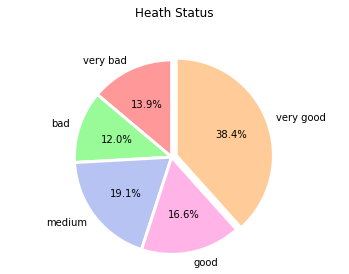

In [29]:
health = 'very bad', 'bad', 'medium', 'good', 'very good'
sizes = [90, 78, 124, 108, 249]
explode = (0, 0, 0, 0, 0.05)  
colors = [ '#ff9999','#98FB98','#B7C3F3','#ffb3e6', '#ffcc99' ] 


fig1, ax1 = plt.subplots()
ax1.pie(sizes, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, explode=explode, labels=health, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Heath Status', pad=32)
plt.show()

# Part 2: Feature Engineering 

In [30]:
# SPF.head()

In [31]:
# Remove G1, G2, G3, cur_avg

X = SPF.drop(['G1', 'G2', 'G3', 'cur_avg'], axis=1)
X.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0


## 2.1 Categorical Features

### 2.1.1 One-hot Encoding to convert 4 binary features: Mjob, Fjob, reason, guardian

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
def OneHotEncoding(df, encode, category):
  cur_df = encode.transform(df[category]) 
  features = encode.get_feature_names_out(category) 
  transformed = pd.DataFrame(cur_df.toarray(), columns = features)
  res = pd.concat([df.reset_index(drop=True), transformed], axis=1) 
  return res.drop(category, axis=1) 

In [34]:
# Convert categorical features with >=3 levels using One-Hot Encoding approach 

cat = ['Mjob', 'Fjob', 'reason', 'guardian']

for i in range(len(cat)):
  category = [cat[i]] 

  initial_ohe = OneHotEncoder()
  initial_ohe.fit(SPF[category]) 

  X = OneHotEncoding(X, initial_ohe, category) 

In [35]:
SPF.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cur_avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,7.333
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,10.333
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,12.333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,14.000
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,12.333


In [36]:
X.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
1,GP,F,17,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
2,GP,F,15,U,LE3,T,1,1,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
3,GP,F,15,U,GT3,T,4,2,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
4,GP,F,16,U,GT3,T,3,3,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
5,GP,M,16,U,LE3,T,4,3,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
6,GP,M,16,U,LE3,T,2,2,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
7,GP,F,17,U,GT3,A,4,4,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
8,GP,M,15,U,LE3,A,3,2,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
9,GP,M,15,U,GT3,T,3,4,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000


### 2.1.2. Ordinal Encoding

In [37]:
# Convert categorical features with 2 levels using Ordinal Encoding approach 
from sklearn.preprocessing import OrdinalEncoder

In [38]:
cat_cols = X.columns[X.dtypes == 'object']
cat_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [39]:
bi_cat = []
s = set(cat)

for feature in cat_cols:
  if feature not in s:
    bi_cat.append(feature)

bi_cat

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [40]:
# Covert features using Ordinal Encoding 

for j in range(len(bi_cat)):
  name = [bi_cat[j]] 

  initial_oe = OrdinalEncoder() 
  initial_oe.fit(X[name]) 

  X[name] = initial_oe.transform(X[name])

In [41]:
X.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0.000,0.000,18,1.000,0.000,0.000,4,4,2,2,0,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,4,3,4,1,1,3,4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0.000,0.000,17,1.000,0.000,1.000,1,1,1,2,0,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,5,3,3,1,1,3,2,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
2,0.000,0.000,15,1.000,1.000,1.000,1,1,1,2,0,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,4,3,2,2,3,3,6,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
3,0.000,0.000,15,1.000,0.000,1.000,4,2,1,3,0,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,3,2,2,1,1,5,0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
4,0.000,0.000,16,1.000,0.000,1.000,3,3,1,2,0,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,4,3,2,1,2,5,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
5,0.000,1.000,16,1.000,1.000,1.000,4,3,1,2,0,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,5,4,2,1,2,5,6,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
6,0.000,1.000,16,1.000,1.000,1.000,2,2,1,2,0,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,4,4,4,1,1,3,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
7,0.000,0.000,17,1.000,0.000,0.000,4,4,2,2,0,1.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,4,1,4,1,1,1,2,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
8,0.000,1.000,15,1.000,1.000,0.000,3,2,1,2,0,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,4,2,2,1,1,1,0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
9,0.000,1.000,15,1.000,0.000,1.000,3,4,1,2,0,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,5,5,1,1,1,5,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000


## 2.2 Numerical Features

### 2.2.1 Missing data

In [42]:
GradeDF = SPF[['G1','G2','G3']]
GradeDF.head() 

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [43]:
print(GradeDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   G1      649 non-null    int64
 1   G2      649 non-null    int64
 2   G3      649 non-null    int64
dtypes: int64(3)
memory usage: 15.3 KB
None


In [44]:
# step 1: replace those missing data to nan 
GradeDF[['G1','G2','G3']] = GradeDF[['G1','G2','G3']].replace(0, np.nan)
print(GradeDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G1      648 non-null    float64
 1   G2      642 non-null    float64
 2   G3      634 non-null    float64
dtypes: float64(3)
memory usage: 15.3 KB
None


/Users/meetshah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [45]:
GradeDF.head()

,G1,G2,G3
0,NaN,11.000,11.000
1,9.000,11.000,11.000
2,12.000,13.000,12.000
3,14.000,14.000,14.000
4,11.000,13.000,13.000


In [46]:
# Step 2: filing nan by mean value 
newGradeDF123=GradeDF.copy()
newGradeDF123['G1'] = newGradeDF123['G1'].fillna(newGradeDF123['G1'].mean())
newGradeDF123['G2']=newGradeDF123['G2'].fillna(newGradeDF123['G2'].mean())
newGradeDF123['G3']=newGradeDF123['G3'].fillna(newGradeDF123['G3'].mean())

print(newGradeDF123.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G1      649 non-null    float64
 1   G2      649 non-null    float64
 2   G3      649 non-null    float64
dtypes: float64(3)
memory usage: 15.3 KB
None


In [47]:
(newGradeDF123 == 0).sum(axis=0) / newGradeDF123.shape[0]

G1   0.000
G2   0.000
G3   0.000
dtype: float64

In [48]:
newGradeDF123.head()

,G1,G2,G3
0,11.417,11.000,11.000
1,9.000,11.000,11.000
2,12.000,13.000,12.000
3,14.000,14.000,14.000
4,11.000,13.000,13.000


In [49]:
# add average column

newGradeDF123['avgGrade'] =  (newGradeDF123['G1'] + newGradeDF123['G2'] + newGradeDF123['G3']) / 3
newGradeDF123.head()

,G1,G2,G3,avgGrade
0,11.417,11.000,11.000,11.139
1,9.000,11.000,11.000,10.333
2,12.000,13.000,12.000,12.333
3,14.000,14.000,14.000,14.000
4,11.000,13.000,13.000,12.333


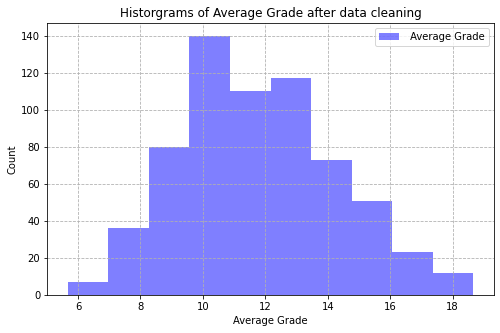

In [50]:
# Visualize the distribution of the label feature: cur_avg
plt.figure(figsize=(8, 5))
plt.hist(newGradeDF123['avgGrade'], color='blue', label=' Average Grade', alpha=0.5)  
plt.title('Historgrams of Average Grade after data cleaning')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--')
plt.xlabel('Average Grade')
plt.ylabel('Count')
plt.show()

In [51]:
X['avgG'] = newGradeDF123['avgGrade']
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,avgG
0,0.000,0.000,18,1.000,0.000,0.000,4,4,2,2,0,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,4,3,4,1,1,3,4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,11.139
1,0.000,0.000,17,1.000,0.000,1.000,1,1,1,2,0,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,5,3,3,1,1,3,2,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,10.333
2,0.000,0.000,15,1.000,1.000,1.000,1,1,1,2,0,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,4,3,2,2,3,3,6,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,12.333
3,0.000,0.000,15,1.000,0.000,1.000,4,2,1,3,0,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,3,2,2,1,1,5,0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,14.000
4,0.000,0.000,16,1.000,0.000,1.000,3,3,1,2,0,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,4,3,2,1,2,5,0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,12.333


### 2.2.2 Feature scaling 

The impact of different scaling methods on the model performance is small. This project used the standard scaling (sc) data .

2 types of scaling feature approaches：

*   Type 1: Standardization: calculating mean and sdandard deviation，then normalize or standardize numerical feature 
*   Type 2: min-max: Forcibly pull the variable between 0 and 1 or -1 and 1 through the maximum value and the minimum value


In [52]:
X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'avgG'],
      dtype='object')

In [53]:
# Standard scaling or standardization 
 
scale_lst = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
             'failures', 'famrel', 'freetime', 'goout', 'Dalc',
             'Walc', 'health', 'absences']  
new_X = X.copy() 

In [54]:
init_scale = preprocessing.StandardScaler()
sc_scale = init_scale.fit(new_X[scale_lst])

new_X[scale_lst] = sc_scale.transform(new_X[scale_lst])
new_X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,avgG
0,0.000,0.000,1.032,1.000,0.000,0.000,1.310,1.541,0.577,0.084,-0.374,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.073,-0.172,0.694,-0.544,-0.998,-0.371,0.073,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,11.139
1,0.000,0.000,0.210,1.000,0.000,1.000,-1.336,-1.189,-0.760,0.084,-0.374,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.120,-0.172,-0.157,-0.544,-0.998,-0.371,-0.358,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,10.333
2,0.000,0.000,-1.433,1.000,1.000,1.000,-1.336,-1.189,-0.760,0.084,-0.374,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.073,-0.172,-1.009,0.539,0.561,-0.371,0.505,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,12.333
3,0.000,0.000,-1.433,1.000,0.000,1.000,1.310,-0.279,-0.760,1.290,-0.374,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,-0.975,-1.124,-1.009,-0.544,-0.998,1.013,-0.789,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,14.000
4,0.000,0.000,-0.611,1.000,0.000,1.000,0.428,0.631,-0.760,0.084,-0.374,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.073,-0.172,-1.009,-0.544,-0.219,1.013,-0.789,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,12.333


# Part 3: Model Training

## 3.1 Split datasets

In [55]:
new_X.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'avgG'],
      dtype='object')

In [56]:
# split into 2 datasets, one for model training (75%), another for model testing(15%)
train, test = train_test_split(new_X, test_size=0.25, random_state = 3)  

In [57]:
train.info()  # 486 entries, total 44 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 522 to 249
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             486 non-null    float64
 1   sex                486 non-null    float64
 2   age                486 non-null    float64
 3   address            486 non-null    float64
 4   famsize            486 non-null    float64
 5   Pstatus            486 non-null    float64
 6   Medu               486 non-null    float64
 7   Fedu               486 non-null    float64
 8   traveltime         486 non-null    float64
 9   studytime          486 non-null    float64
 10  failures           486 non-null    float64
 11  schoolsup          486 non-null    float64
 12  famsup             486 non-null    float64
 13  paid               486 non-null    float64
 14  activities         486 non-null    float64
 15  nursery            486 non-null    float64
 16  higher             486 n

In [58]:
test.info()  # 163 entries, total 44 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 386 to 296
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   school             163 non-null    float64
 1   sex                163 non-null    float64
 2   age                163 non-null    float64
 3   address            163 non-null    float64
 4   famsize            163 non-null    float64
 5   Pstatus            163 non-null    float64
 6   Medu               163 non-null    float64
 7   Fedu               163 non-null    float64
 8   traveltime         163 non-null    float64
 9   studytime          163 non-null    float64
 10  failures           163 non-null    float64
 11  schoolsup          163 non-null    float64
 12  famsup             163 non-null    float64
 13  paid               163 non-null    float64
 14  activities         163 non-null    float64
 15  nursery            163 non-null    float64
 16  higher             163 n

In [59]:
model_train_x = train.drop(['avgG'], axis = 1)  # delete the label 'avgG' in training dataset 
model_train_y = train['avgG'] # select label from the training dataset  

model_test_x = test.drop(['avgG'], axis = 1)   
model_test_y = test['avgG'] 

## 3.2 Lasso linear regression (L1)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge  
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [61]:
# split the training dataset into 2 parts, one part (70%) for training model, another part（30%） for validation (hold-out data)

lr_train, lr_validate = train_test_split(train, test_size=0.30, random_state = 0)  

lr_train_x = lr_train.drop(['avgG'], axis = 1) 
lr_train_y = lr_train['avgG'] 

lr_validate_x = lr_validate.drop(['avgG'], axis = 1) 
lr_validate_y = lr_validate['avgG'] 

In [62]:
alphas = np.linspace(1, 101, num=500)  # Returns num=500 evenly spaced numbers over a specified interval [start= -101, stop=101], return ndarray alphas
# alpha is learning rate

scores = np.empty_like(alphas)  # .empty_like() will return an empty array with same shape of alphas    

In [63]:
#print(alphas)

In [64]:
opt_a = float('-inf')   # opt_a is to store the alpha level when the best hyper parameter found
max_score = float('-inf')  # max_score is to store hyper-parameter when the best R^2 is found

for i, a in enumerate(alphas):   # enumerate() will return index and corresponding element of alpha value 
    lasso = Lasso()  
    lasso.set_params(alpha = a)  # a is the alpha parameter; iteratively try every single hyper-parameter  
    lasso.fit(lr_train_x, lr_train_y)  #  .fit()  will use training dataset to fit model so that obtain lasso 
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)   # lasso.score() will return R^2 after using the validation set and fitting the model; 
                                                            # Then, store R^2 into scores array at index i  
    if scores[i] > max_score:      # update max_score  
        max_score = scores[i]    
        opt_a = a   # update opt_a as the corresponding alpha level when a better hyper-parameter is found  
        lasso_save = lasso # optional code  => lasso_save is used to store the best lasso hyper-parameter for later use again 

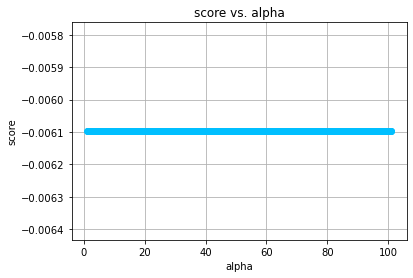

The optimaized alpha： 1.0  and score of Lasso linear is:  -0.006097122017939327


In [65]:
# Draw graph

plt.plot(alphas, scores, color='#00BFFF', linestyle='dashed', marker='o', markerfacecolor='#00BFFF', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_a
print ('The optimaized alpha：', opt_a, ' and score of Lasso linear is: ', max_score)  


In [66]:
# combine the 30% validate data and 70% training data, use the optimal alpha, re-train the model  

lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)  # combine validation set and training set together, which is the original whole training dataset (85%) 

# The above approach is too complicated, we can just use Grid Search 

Lasso()

## 3.3 Ridge linear regression (L2) 

In [67]:
# Use the same training data set, same logic as that in Lasso (linear features)  

alphas = np.linspace (1, 50, num=500)
scores = np.empty_like(alphas)

In [68]:
opt_a = float('-inf')
max_score = float('-inf')

for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge #optional code


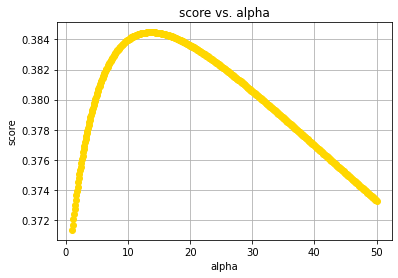

The optimaized alpha： 13.667334669338677  and score of Ridge linear is:  0.3844800709608267


In [69]:
plt.plot(alphas, scores, color='#FFD700', linestyle='dashed', marker='o', markerfacecolor='#FFD700', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model2_para = opt_a
print ('The optimaized alpha：', opt_a, ' and score of Ridge linear is: ', max_score)

In [70]:
# combine the 30% validate data and 70% training data, use the optimal alpha, re-train the model  

ridge_f = Ridge() 
ridge_f.set_params(alpha = opt_a)

ridge_f.fit(model_train_x, model_train_y) # the validation data is part of the 75% training datset，so here should use the whole training dataset to fit ridge regression model  

# ridge_f is the Ridge model (linear feature), to be tested with test data. 

Ridge(alpha=13.667334669338677)

## 3.4 Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [72]:
rf = RandomForestRegressor(random_state=2, max_features='sqrt')   # max_features = "sqrt" means the number of features is sqrt(n_features) 
                                                                  # when looking for the best number of features to split  to the next level. 

param_grid = {
        'n_estimators':[55,56,57,58,59,60,61,62,63,64,65],   # how many tree are divided into the next level
        'max_depth':[15,16,17,18,19,20,21]  # tree depth 
    }

clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5) # Gride Search to find optimized hyper-parameter   

clf.fit(model_train_x, model_train_y) # use the training dataset to fit RF model  

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             random_state=2),
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20, 21],
                         'n_estimators': [55, 56, 57, 58, 59, 60, 61, 62, 63,
                                          64, 65]})

In [73]:
max_depth = [15,16,17,18,19,20,21]    # 7 rows or levels, each define the tree depth   
n_estimators = [55,56,57,58,59,60,61,62,63,64,65]   # 11 cols, each represents how many tree are divided into the next level  

values = clf.cv_results_['mean_test_score']  # clf.cv_results_ will return a dictionary, 'mean_test_score' is one key, corresponding values will be stored in values 

scores = values.reshape(len(max_depth), len(n_estimators))  # for later drawing the graph  

<Figure size 432x288 with 0 Axes>

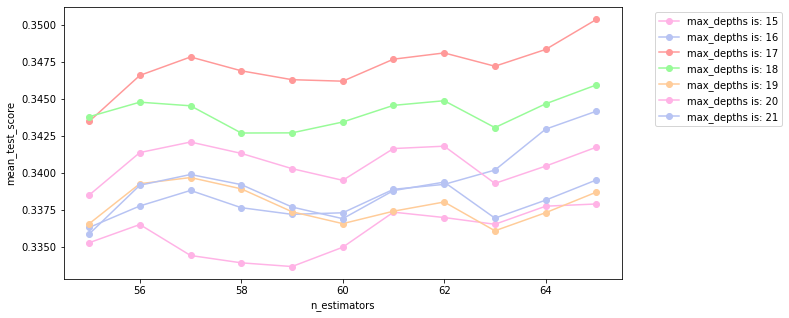

the best parameter for max_depth is: 17
the best parameter for n_estimators is: 65


In [74]:
plt.figure(1) 
plt.figure(figsize=[10, 5])
plt.subplot(1,1,1)  # subplot(nrows, ncols, index, **kwargs)

for i, j in enumerate(max_depth): 
  plt.plot(n_estimators, scores[i], '-o', label='max_depths is: ' + str(j))  
                                  #  '-' => solid line style          
                                  #  'o' => circle marker   

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.show()

print('the best parameter for max_depth is: ' + str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: ' + str(clf.best_params_['n_estimators']))

Findings: As can be seen from the figure above, the best line is the No.17 green line, which corresponds to the highest y value, that is, R^2, and the corresponding depth is 17, which can hold 65 trees in total.

# Part 4: Model Results Evaluation

## 4.1: Evaluate all models

In [75]:
# create 4 new datasets  

train_x = model_train_x
train_y = model_train_y

test_x = model_test_x
test_y = model_test_y

In [76]:
# For Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import  mean_squared_error

lasso = Lasso(alpha=model1_para) # model1_para is the optimal hyper parameter that was trained before  
lasso.fit(train_x, train_y) # use features in original training set to predict the label and to fit a Lasso Regression Model  
pred_y = lasso.predict(test_x) # use features in testing dataset to do prediction，store obtained results of label score as pred_y   

lasso_score = lasso.score(test_x, test_y)  # obtain R^2 throug compaing predicted pred_y with the test_y in testing set    
MSE_lasso = mean_squared_error(test_y, pred_y) 
RMSE_lasso = np.sqrt(MSE_lasso) 

print ('lasso R^2 score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso R^2 score:  0.0128951472353106
Mean square error of lasso:  5.750003634304394
Root mean squared error of lasso: 2.3979165194610914


In [77]:
# For Ridge Regression 

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=model2_para)  # model2_para is the optimal hyper parameter that was trained before
ridge.fit(train_x, train_y) 
pred_y = ridge.predict(test_x)

ridge_score = ridge.score(test_x, test_y)  # R^2
MSE_ridge = mean_squared_error(test_y, pred_y)
RMSE_ridge = np.sqrt(MSE_ridge)

print ('ridge R^2 score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge R^2 score:  0.2790277080498581
Mean square error of ridge:  4.199749689544207
Root mean squared error of ridge: 2.049329082783975


In [78]:
# For randomforest regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth'], max_features='sqrt', random_state=2, n_jobs=-1)
                                                        # n_jobs is to identify how many processes or threads need to the use for routines parallelized with joblib
                                                        # If n_jobs=1, which means it don't use joblib parallelism at all, that is useful for debugging.

rf.fit(train_x, train_y)    
pred_y = rf.predict(test_x)   

rf_score = rf.score(test_x, test_y) # return R^2 
MSE_rf = mean_squared_error(test_y, pred_y)
RMSE_rf = np.sqrt(MSE_rf)

print ('rf R^2 score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

# R^2 = 0.3 does not indicate the model performance is not good because it is real data.

rf R^2 score:  0.3016395076270826
Mean square error of rf:  4.068033257006115
Root mean squared error of rf: 2.016936602128613


## 4.2: Model Comparison

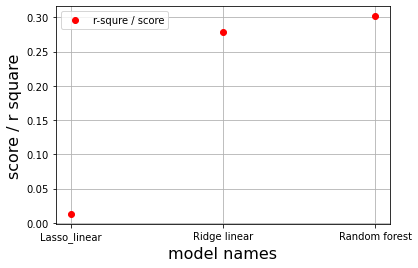

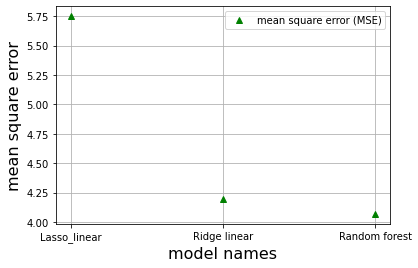

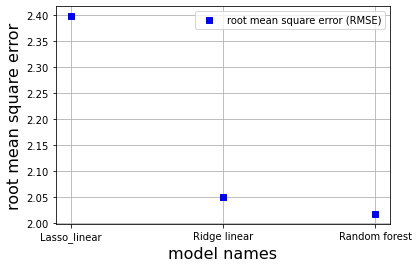

In [79]:
lst_score = [lasso_score, ridge_score, rf_score]  # R^2 for each model 
MSE_lst =  [MSE_lasso, MSE_ridge, MSE_rf]
RMSE_lst =  [RMSE_lasso, RMSE_ridge, RMSE_rf]
model_lst = ['Lasso_linear', 'Ridge linear', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()

Finding:
1. The 1st table: It can be seen that comparing the three models with the y-axis R^2 as the standard, Lasso is the worst, and RF is the best because the R^2 value is the largest and highest.

2. The 2nd table: It can be seen that, taking MSE as the model measurement standard, Lasso Ridge is very poor because MSE is large, and RF is the best because MSE value is the smallest

3. The 3rd picture: It can be seen that taking RMSE as the model measurement standard, Lasso Ridge is very poor because the RMSE is large, and RF is the best because the RMSE value is the smallest

4. According to MSE, RMSE, and R square, the Random Forest Regression has the best performance

## 4.3 Feature Importance

In [80]:
importances = rf.feature_importances_
feature_name = train_x.columns.values
indices = np.argsort(importances)[::-1] 
# np.argsort(importances) will returns sorted indices as ndarray type that would sort an array in a descending order   

<Figure size 432x288 with 0 Axes>

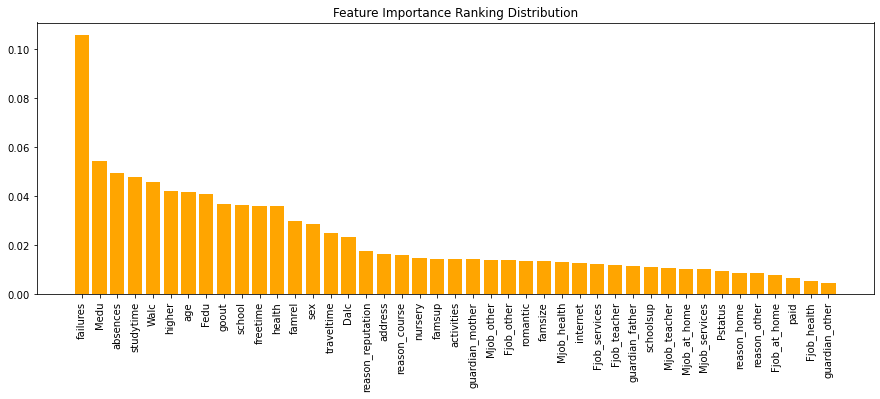

In [81]:
plt.figure(1)
plt.figure(figsize = [15,5])
plt.bar(feature_name[indices[:]], importances[indices[:]], color='orange')  
plt.title('Feature Importance Ranking Distribution')                                                                               
plt.xticks(rotation=90)  # control the rotation direction of label as 90 degree 
plt.show()

<Figure size 432x288 with 0 Axes>

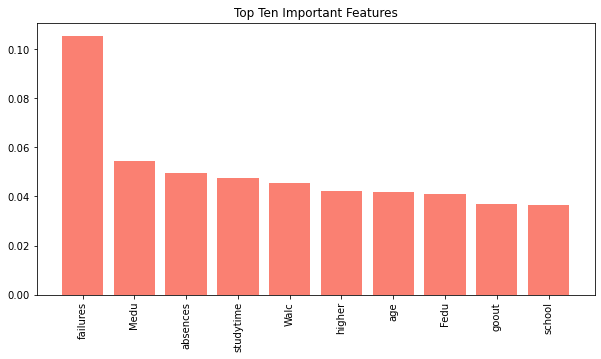

In [82]:
plt.figure(1)
plt.figure(figsize = [10,5])
plt.bar(feature_name[indices[:10]], importances[indices[:10]], color='#FA8072')   # show top 10 important features 
plt.title('Top Ten Important Features')                                                                               
plt.xticks(rotation=90)  
plt.show()

Findings:
1. From the figure above, the most important feature is failures (number of past class failures). The more number of past classes failure, the less likely students will perform well. 

2. The second important feature is Medu (Mother's education). That is align on the literature (Kao & Tienda, 1998; Plunkett & Bamaca-Gomez, 2003; Teachman & Paasch, 1998), which is a valid and reliable result. In addition, Fedu (Father's education) is also an important element for students' academic performance.  

3. At the same time, the least important features include guardian(student's guardian), Fjob(Father's job), Mjob(Mother's job), paid(extra paid classes within the course subject), and Pstatus(parent's cohabitation status).  

## 4.4 Recommendations

Recommendations:
1. Improve course pass rate: a). Developing students' learning interests and learning motivation; b). Providing opportunity of obtaining extra grade bonus; c). Competition prizes;  d). Teaching assistant lab; e). Improving teachers' teaching skill and course quality; etc.   

2. Parents' behavior potentially impact childern and adolescents daily life. Parents could build up a learning envirment that could directly impact children's study status and learning willingness. 

3. Student advisor could work closely with students' parents and increase their aspiration on students' academic development. That could also facilitate parents to realize that they can help students solve problems together, as well as pay more attention on chilern's development.   